In [1]:
# the AND operator as a perceptron
import pandas as pd

# Change the weights to see if you can simulate the AND operator correctly
weight1 = 1
weight2 = 1
bias = -1.5

# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                  -1.5                    0          Yes
       0          1                  -0.5                    0          Yes
       1          0                  -0.5                    0          Yes
       1          1                   0.5                    1          Yes


In [2]:
# Change the weights to see if you can simulate the NOT operator (on the second input) correctly
weight1 = 0.0
weight2 = -1
bias = 0.5


# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [True, False, True, False]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                   0.5                    1          Yes
       0          1                  -0.5                    0          Yes
       1          0                   0.5                    1          Yes
       1          1                  -0.5                    0          Yes


## The perceptron algorithm

In [3]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[0], W, b)
        if(y_hat==1 and y[i]==0):
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b-= learn_rate
        elif(y_hat==0 and y[i]==1):
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b+= learn_rate
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

In [4]:
data = np.loadtxt('data.csv',delimiter=',')
X = data[:,0:2]
y = data[:,-1]
boundaries = trainPerceptronAlgorithm(X, y)

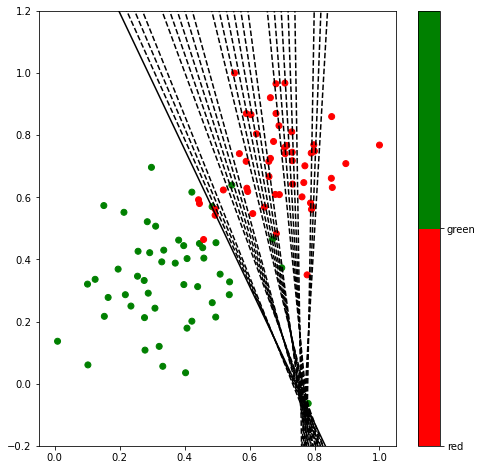

In [5]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
t = np.linspace(0,1,num=5)
colors = ['red','green']
fig = plt.figure(figsize=(8,8))
axes = plt.gca()
axes.set_ylim([-0.2,1.2])
plt.scatter(X[:,0], X[:,1], c=y, cmap=matplotlib.colors.ListedColormap(colors))
cb = plt.colorbar()
loc = np.arange(0,max(y),max(y)/float(len(colors)))
cb.set_ticks(loc)
for i in range(len(boundaries)-1):
    plt.plot(t, boundaries[i][0]*t + boundaries[i][1],'k--')
plt.plot(t, boundaries[-1][0]*t + boundaries[-1][1],color='k')
cb.set_ticklabels(colors)

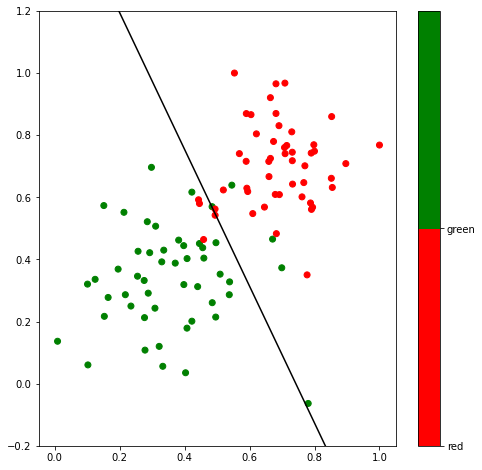

In [6]:
colors = ['red','green']
fig = plt.figure(figsize=(8,8))
axes = plt.gca()
axes.set_ylim([-0.2,1.2])
plt.scatter(X[:,0], X[:,1], c=y, cmap=matplotlib.colors.ListedColormap(colors))
cb = plt.colorbar()
loc = np.arange(0,max(y),max(y)/float(len(colors)))
cb.set_ticks(loc)
plt.plot(t, boundaries[-1][0]*t + boundaries[-1][1],color='k')
cb.set_ticklabels(colors)